#- In this case study, you have been provided with images of traffic signs and the goal is to train a Deep Network to classify them
#- The dataset contains 43 different classes of images. 
#- Classes are as listed below: 

    - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
    - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
    - ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
    - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
    - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
    - (10, b'No passing for vehicles over 3.5 metric tons')
    - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
    - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
    - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
    - (18, b'General caution') (19, b'Dangerous curve to the left')
    - (20, b'Dangerous curve to the right') (21, b'Double curve')
    - (22, b'Bumpy road') (23, b'Slippery road')
    - (24, b'Road narrows on the right') (25, b'Road work')
    - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
    - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
    - (31, b'Wild animals crossing')
    - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
    - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
    - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
    - (40, b'Roundabout mandatory') (41, b'End of no passing')
    - (42, b'End of no passing by vehicles over 3.5 metric tons')


In [ ]:
# importing libraries 

import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pickle 
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D , AveragePooling2D , Dense , Flatten , Dropout 
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [ ]:
#importing google drive with in the colab notebook

from  google.colab import drive 
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# importing the datadet 

with open("/content/drive/My Drive/Traffic signal classification/traffic-signs-data/train.p" , mode = 'rb') as training_data:
  train = pickle.load(training_data)
with open("/content/drive/My Drive/Traffic signal classification/traffic-signs-data/valid.p" , mode = 'rb') as validating_data:
  valid = pickle.load(validating_data)
with open("/content/drive/My Drive/Traffic signal classification/traffic-signs-data/test.p" , mode = 'rb') as testing_data:
  test = pickle.load(testing_data)

In [ ]:
# dividing the dataset into input an output feature   

x_train , y_train = train['features'] , train['labels']
x_valid , y_valid = valid['features'] , valid['labels']
x_test , y_test = test['features'] , test['labels']

In [ ]:
# convert the image from rgb to gray 

x_train_gray = np.sum(x_train/3 , axis = 3 , keepdims = True )
x_valid_gray = np.sum(x_valid/3 , axis = 3 , keepdims = True )
x_test_gray = np.sum(x_test/3 , axis = 3 , keepdims = True )

In [ ]:
# normalizing the input feature ( feature scaling )

x_train_norm = (x_train_gray - 128)/128
x_valid_norm = (x_valid_gray - 128)/128
x_test_norm = (x_test_gray- 128)/128



#The model consists of the following layers: 

##- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride --> (32-5+1)/1=28
    - Activation function  = RELU
    - AveragePooling with Input = 28x28x6 and Output = 14x14x6


##- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Output = 10x10x16
    - Output = (Input-filter+1)/strides --> 10 = 14-5+1/1
    - Activation function  = RELU
    - AveragePooling with Input = 10x10x16 and Output = 5x5x16

##- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

##- STEP 4: FULLY CONNECTED LAYER
    - Input = 400 and Output = 120
    - Activation function  = RELU

##- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Input = 120 and Output = 84
    - Activation function  = RELU

##- STEP 6: FULLY CONNECTED LAYER
    - Input = 84 and Output = 43
    - Activation function  = SOFTMAX

In [ ]:
# training the model

cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6 , kernel_size=(5,5) , activation= 'relu' , input_shape=(32,32,1) ))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16 , kernel_size= (5,5) , activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120 , activation='relu'))
cnn_model.add(Dense(units=84 , activation='relu'))
cnn_model.add(Dense(units=43 , activation='softmax'))


In [ ]:
# compilation of the model with network of other features

cnn_model.compile(loss='sparse_categorical_crossentropy' , optimizer  = Adam(learning_rate=0.001) , metrics=['accuracy'])
history = cnn_model.fit(x_train_norm,y_train,
              batch_size=500,
              epochs=10,
              verbose=1,
              validation_data=(x_valid_norm,y_valid))

Epoch 1/10
70/70 [==============================] - 17s 238ms/step - loss: 3.3084 - accuracy: 0.1359 - val_loss: 2.9421 - val_accuracy: 0.2619
Epoch 2/10
70/70 [==============================] - 17s 240ms/step - loss: 1.8749 - accuracy: 0.4810 - val_loss: 1.5970 - val_accuracy: 0.5408
Epoch 3/10
70/70 [==============================] - 17s 238ms/step - loss: 1.0511 - accuracy: 0.6998 - val_loss: 1.1408 - val_accuracy: 0.6649
Epoch 4/10
70/70 [==============================] - 17s 239ms/step - loss: 0.7410 - accuracy: 0.7924 - val_loss: 0.8791 - val_accuracy: 0.7376
Epoch 5/10
70/70 [==============================] - 17s 238ms/step - loss: 0.5739 - accuracy: 0.8415 - val_loss: 0.7732 - val_accuracy: 0.7698
Epoch 6/10
70/70 [==============================] - 17s 241ms/step - loss: 0.4652 - accuracy: 0.8747 - val_loss: 0.6698 - val_accuracy: 0.8045
Epoch 7/10
70/70 [==============================] - 20s 284ms/step - loss: 0.3825 - accuracy: 0.9012 - val_loss: 0.6080 - val_accuracy: 0.8188

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

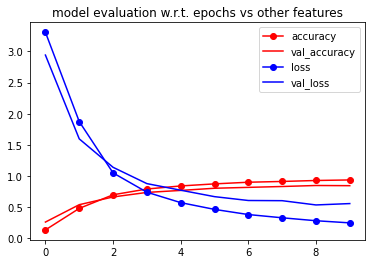

In [ ]:

# model evaluation

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs,accuracy,'ro-' , label='accuracy')
plt.plot(epochs,val_accuracy,'r' , label='val_accuracy')
plt.plot(epochs,loss,'bo-' , label='loss')
plt.plot(epochs,val_loss,'b' , label='val_loss')
plt.title('model evaluation w.r.t. epochs vs other features')
plt.legend()
plt.show()

In [ ]:
# predicting the value by aplling model on test set 

y_pred = cnn_model.predict_classes(x_test_norm)

0.817735550277118


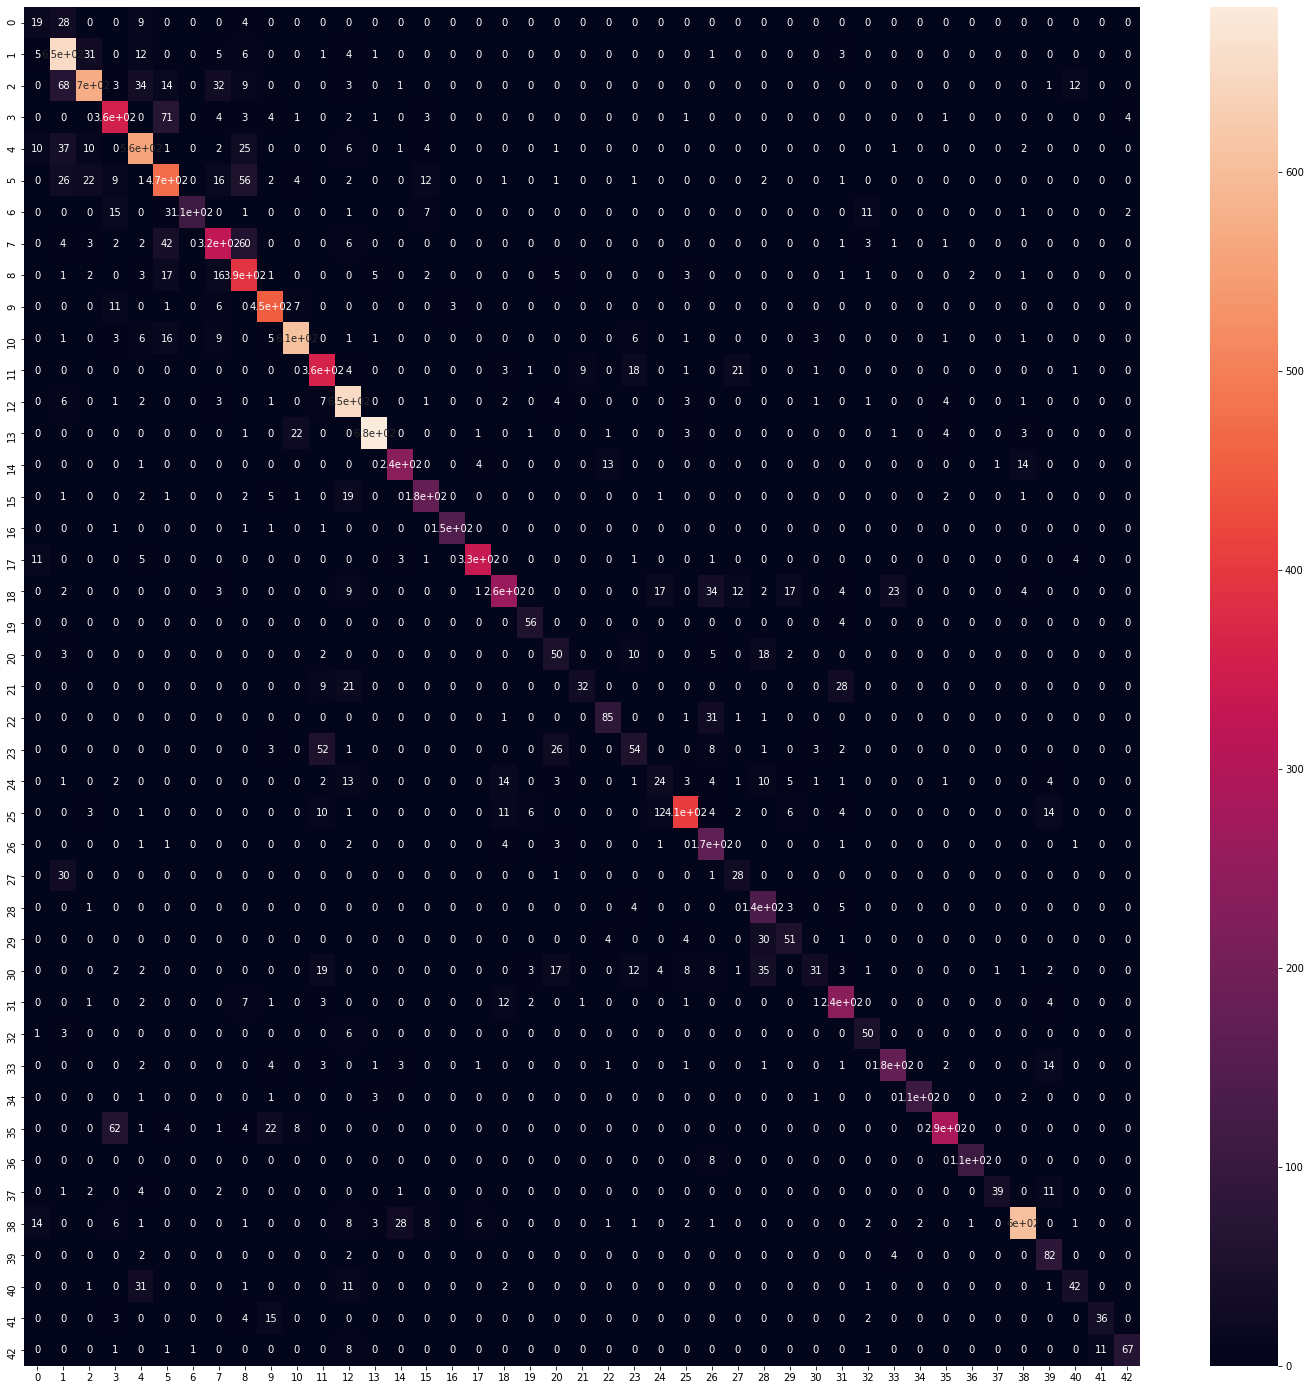

In [ ]:
# evaluation of model using confusion metrix

cm = confusion_matrix(y_test , y_pred)
plt.figure(figsize=(25,25))
sns.heatmap(cm , annot = True)
print(accuracy_score(y_test , y_pred))

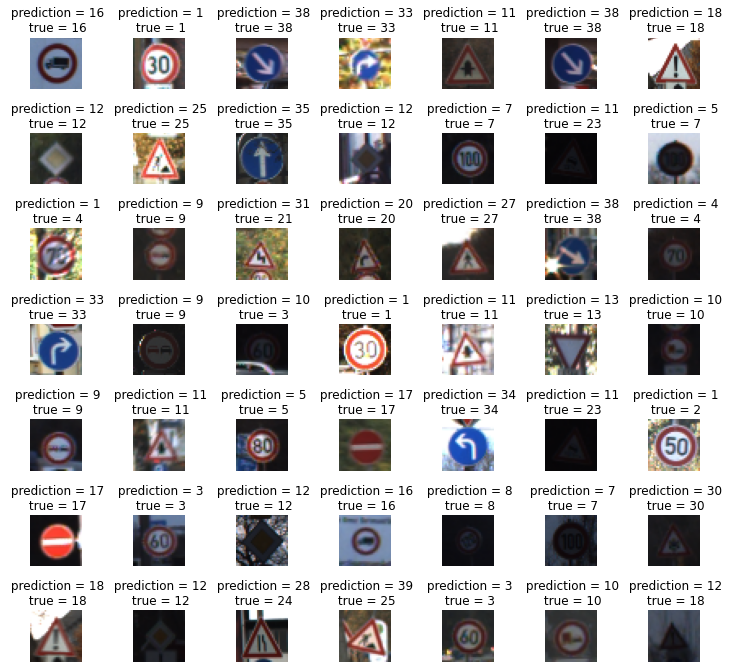

In [ ]:
# showing the model outcome on random set along with its true value 

l=7
w=7
fig , axis = plt.subplots(l , w , figsize = (12,12))
axis = axis.ravel()

for i in np.arange(0,l*w):
  axis[i].imshow(x_test[i])
  axis[i].set_title(" prediction = {}\n true = {}".format(y_pred[i],y_test[i]))
  axis[i].axis('off')

plt.subplots_adjust(wspace=1)  